In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [63]:
# Para que se vean todas las columnas
pd.set_option('display.max_columns', None)

## Limpieza de datos

In [64]:
dataset = pd.read_csv('../Datos/clientes_tarifas_modelo.csv')
dataset.head(10)

,Unnamed: 0.1,Unnamed: 0,id_tarifa,consumo_kWh,%consumo_valle,%consumo_llano,%consumo_punta,%consumo_8h,%consumo_16h,compania,tarifa,tp_punta_euros/kwh/dia,tp_valle_euros/kwh/dia,peaje_tran_dist_pot_punta,peaje_tran_dist_pot_valle,peaje_ener_valle_tdc,peaje_ener_llano_tdc,peaje_ener_punta_tdc,termino_consumo_euros/kwh/hora,tc_valle_euros/kwh/hora,tc_llano_euros/kwh/hora,tc_punta_euros/kwh/hora,tc_8h_euros/kwh/hora,tc_16h_euros/kwh/hora,mercado,tipo,otros,alquiler_equipo_euros/dia,impuesto_actual,bono_social_euro/dia,margen_euros/kWh/dia,consumo_unico,consumo_valle,consumo_llano,consumo_punta,consumo_8h,consumo_16h,consumo_euros_unico,consumo_euros_valle,consumo_euros_llano,consumo_euros_punta,consumo_euros_8h,consumo_euros_16h,precio_final
0,0,0,0,202,6,75,19,30,70,Repsol,Mis 10 Horas,0.068192,0.068192,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.0,0.0,0.0,0.086415,0.17283,Libre,DH,0.0,0.026557,5.11,0.0,0.0,0.0,0.0,0.0,0.0,60.60,141.40,0.0,0.0,0.0,0.0,5.236749,24.438162,29.674911
1,1,1,0,279,23,19,58,1,99,Repsol,Mis 10 Horas,0.068192,0.068192,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.0,0.0,0.0,0.086415,0.17283,Libre,DH,0.0,0.026557,5.11,0.0,0.0,0.0,0.0,0.0,0.0,2.79,276.21,0.0,0.0,0.0,0.0,0.241098,47.737374,47.978472
2,2,2,0,192,36,3,61,14,86,Repsol,Mis 10 Horas,0.068192,0.068192,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.0,0.0,0.0,0.086415,0.17283,Libre,DH,0.0,0.026557,5.11,0.0,0.0,0.0,0.0,0.0,0.0,26.88,165.12,0.0,0.0,0.0,0.0,2.322835,28.537690,30.860525
3,3,3,0,114,59,23,18,56,44,Repsol,Mis 10 Horas,0.068192,0.068192,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.0,0.0,0.0,0.086415,0.17283,Libre,DH,0.0,0.026557,5.11,0.0,0.0,0.0,0.0,0.0,0.0,63.84,50.16,0.0,0.0,0.0,0.0,5.516734,8.669153,14.185886
4,4,4,0,206,49,48,3,74,26,Repsol,Mis 10 Horas,0.068192,0.068192,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.0,0.0,0.0,0.086415,0.17283,Libre,DH,0.0,0.026557,5.11,0.0,0.0,0.0,0.0,0.0,0.0,152.44,53.56,0.0,0.0,0.0,0.0,13.173103,9.256775,22.429877
5,5,5,0,171,35,5,60,33,67,Repsol,Mis 10 Horas,0.068192,0.068192,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.0,0.0,0.0,0.086415,0.17283,Libre,DH,0.0,0.026557,5.11,0.0,0.0,0.0,0.0,0.0,0.0,56.43,114.57,0.0,0.0,0.0,0.0,4.876398,19.801133,24.677532
6,6,6,0,288,38,41,21,67,33,Repsol,Mis 10 Horas,0.068192,0.068192,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.0,0.0,0.0,0.086415,0.17283,Libre,DH,0.0,0.026557,5.11,0.0,0.0,0.0,0.0,0.0,0.0,192.96,95.04,0.0,0.0,0.0,0.0,16.674638,16.425763,33.100402
7,7,7,0,120,57,11,32,74,26,Repsol,Mis 10 Horas,0.068192,0.068192,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.0,0.0,0.0,0.086415,0.17283,Libre,DH,0.0,0.026557,5.11,0.0,0.0,0.0,0.0,0.0,0.0,88.80,31.20,0.0,0.0,0.0,0.0,7.673652,5.392296,13.065948
8,8,8,0,202,2,17,81,28,72,Repsol,Mis 10 Horas,0.068192,0.068192,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.0,0.0,0.0,0.086415,0.17283,Libre,DH,0.0,0.026557,5.11,0.0,0.0,0.0,0.0,0.0,0.0,56.56,145.44,0.0,0.0,0.0,0.0,4.887632,25.136395,30.024028
9,9,9,0,221,39,20,41,65,35,Repsol,Mis 10 Horas,0.068192,0.068192,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.0,0.0,0.0,0.086415,0.17283,Libre,DH,0.0,0.026557,5.11,0.0,0.0,0.0,0.0,0.0,0.0,143.65,77.35,0.0,0.0,0.0,0.0,12.413515,13.368400,25.781915


In [65]:
dataset.shape

(2080, 44)

In [66]:
dataset['tipo'].unique()

array(['DH', 'FIJO', 'PVPC', 'TRAMOS'], dtype=object)

In [67]:
# Pasamos a tipo numerico el tipo
label_encoder = LabelEncoder()

# Aplicar LabelEncoder a la columna 'tipo'
dataset['tipo_numerico'] = label_encoder.fit_transform(dataset['tipo'])

In [68]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0.1                    2080 non-null   int64  
 1   Unnamed: 0                      2080 non-null   int64  
 2   id_tarifa                       2080 non-null   int64  
 3   consumo_kWh                     2080 non-null   int64  
 4   %consumo_valle                  2080 non-null   int64  
 5   %consumo_llano                  2080 non-null   int64  
 6   %consumo_punta                  2080 non-null   int64  
 7   %consumo_8h                     2080 non-null   int64  
 8   %consumo_16h                    2080 non-null   int64  
 9   compania                        2080 non-null   object 
 10  tarifa                          2080 non-null   object 
 11  tp_punta_euros/kwh/dia          2080 non-null   float64
 12  tp_valle_euros/kwh/dia          20

In [69]:
dataset

,Unnamed: 0.1,Unnamed: 0,id_tarifa,consumo_kWh,%consumo_valle,%consumo_llano,%consumo_punta,%consumo_8h,%consumo_16h,compania,tarifa,tp_punta_euros/kwh/dia,tp_valle_euros/kwh/dia,peaje_tran_dist_pot_punta,peaje_tran_dist_pot_valle,peaje_ener_valle_tdc,peaje_ener_llano_tdc,peaje_ener_punta_tdc,termino_consumo_euros/kwh/hora,tc_valle_euros/kwh/hora,tc_llano_euros/kwh/hora,tc_punta_euros/kwh/hora,tc_8h_euros/kwh/hora,tc_16h_euros/kwh/hora,mercado,tipo,otros,alquiler_equipo_euros/dia,impuesto_actual,bono_social_euro/dia,margen_euros/kWh/dia,consumo_unico,consumo_valle,consumo_llano,consumo_punta,consumo_8h,consumo_16h,consumo_euros_unico,consumo_euros_valle,consumo_euros_llano,consumo_euros_punta,consumo_euros_8h,consumo_euros_16h,precio_final,tipo_numerico
0,0,0,0,202,6,75,19,30,70,Repsol,Mis 10 Horas,0.068192,0.068192,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.000000,0.000000,0.000000,0.086415,0.17283,Libre,DH,0.00,0.026557,5.11,0.0,0.0,0.0,0.00,0.00,0.00,60.60,141.40,0.0,0.000000,0.000000,0.000000,5.236749,24.438162,29.674911,0
1,1,1,0,279,23,19,58,1,99,Repsol,Mis 10 Horas,0.068192,0.068192,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.000000,0.000000,0.000000,0.086415,0.17283,Libre,DH,0.00,0.026557,5.11,0.0,0.0,0.0,0.00,0.00,0.00,2.79,276.21,0.0,0.000000,0.000000,0.000000,0.241098,47.737374,47.978472,0
2,2,2,0,192,36,3,61,14,86,Repsol,Mis 10 Horas,0.068192,0.068192,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.000000,0.000000,0.000000,0.086415,0.17283,Libre,DH,0.00,0.026557,5.11,0.0,0.0,0.0,0.00,0.00,0.00,26.88,165.12,0.0,0.000000,0.000000,0.000000,2.322835,28.537690,30.860525,0
3,3,3,0,114,59,23,18,56,44,Repsol,Mis 10 Horas,0.068192,0.068192,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.000000,0.000000,0.000000,0.086415,0.17283,Libre,DH,0.00,0.026557,5.11,0.0,0.0,0.0,0.00,0.00,0.00,63.84,50.16,0.0,0.000000,0.000000,0.000000,5.516734,8.669153,14.185886,0
4,4,4,0,206,49,48,3,74,26,Repsol,Mis 10 Horas,0.068192,0.068192,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.000000,0.000000,0.000000,0.086415,0.17283,Libre,DH,0.00,0.026557,5.11,0.0,0.0,0.0,0.00,0.00,0.00,152.44,53.56,0.0,0.000000,0.000000,0.000000,13.173103,9.256775,22.429877,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,2075,2075,103,230,72,11,17,90,10,Aduriz Energia,coste + fija,0.080039,0.003141,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.093282,0.129895,0.179284,0.000000,0.00000,Libre,TRAMOS,3.72,0.026557,5.11,0.0,0.0,0.0,165.60,25.30,39.10,0.00,0.00,0.0,15.447499,3.286344,7.010004,0.000000,0.000000,25.743847,3
2076,2076,2076,103,255,34,62,4,51,49,Aduriz Energia,coste + fija,0.080039,0.003141,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.093282,0.129895,0.179284,0.000000,0.00000,Libre,TRAMOS,3.72,0.026557,5.11,0.0,0.0,0.0,86.70,158.10,10.20,0.00,0.00,0.0,8.087549,20.536400,1.828697,0.000000,0.000000,30.452646,3
2077,2077,2077,103,134,12,22,66,98,2,Aduriz Energia,coste + fija,0.080039,0.003141,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.093282,0.129895,0.179284,0.000000,0.00000,Libre,TRAMOS,3.72,0.026557,5.11,0.0,0.0,0.0,16.08,29.48,88.44,0.00,0.00,0.0,1.499975,3.829305,15.855877,0.000000,0.000000,21.185156,3
2078,2078,2078,103,288,11,33,56,27,73,Aduriz Energia,coste + fija,0.080039,0.003141,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.093282,0.129895,0.179284,0.000000,0.00000,Libre,TRAMOS,3.72,0.026557,5.11,0.0,0.0,0.0,31.68,95.04,161.28,0.00,0.00,0.0,2.955174,12.345221,28.914924,0.000000,0.000000,44.215318,3


In [70]:
dataset.isnull().sum()

Unnamed: 0.1                      0
Unnamed: 0                        0
id_tarifa                         0
consumo_kWh                       0
%consumo_valle                    0
%consumo_llano                    0
%consumo_punta                    0
%consumo_8h                       0
%consumo_16h                      0
compania                          0
tarifa                            0
tp_punta_euros/kwh/dia            0
tp_valle_euros/kwh/dia            0
peaje_tran_dist_pot_punta         0
peaje_tran_dist_pot_valle         0
peaje_ener_valle_tdc              0
peaje_ener_llano_tdc              0
peaje_ener_punta_tdc              0
termino_consumo_euros/kwh/hora    0
tc_valle_euros/kwh/hora           0
tc_llano_euros/kwh/hora           0
tc_punta_euros/kwh/hora           0
tc_8h_euros/kwh/hora              0
tc_16h_euros/kwh/hora             0
mercado                           0
tipo                              0
otros                             0
alquiler_equipo_euros/dia   

In [71]:
pd.get_dummies(dataset['mercado'], dtype='int')

,Libre,Regulado
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
2075,1,0
2076,1,0
2077,1,0
2078,1,0


In [72]:
# Creamos los dummies del tipo de mercado

dt = pd.merge(dataset, pd.get_dummies(dataset['mercado'], dtype='int'), left_index=True, right_index=True)

In [73]:
dt

,Unnamed: 0.1,Unnamed: 0,id_tarifa,consumo_kWh,%consumo_valle,%consumo_llano,%consumo_punta,%consumo_8h,%consumo_16h,compania,tarifa,tp_punta_euros/kwh/dia,tp_valle_euros/kwh/dia,peaje_tran_dist_pot_punta,peaje_tran_dist_pot_valle,peaje_ener_valle_tdc,peaje_ener_llano_tdc,peaje_ener_punta_tdc,termino_consumo_euros/kwh/hora,tc_valle_euros/kwh/hora,tc_llano_euros/kwh/hora,tc_punta_euros/kwh/hora,tc_8h_euros/kwh/hora,tc_16h_euros/kwh/hora,mercado,tipo,otros,alquiler_equipo_euros/dia,impuesto_actual,bono_social_euro/dia,margen_euros/kWh/dia,consumo_unico,consumo_valle,consumo_llano,consumo_punta,consumo_8h,consumo_16h,consumo_euros_unico,consumo_euros_valle,consumo_euros_llano,consumo_euros_punta,consumo_euros_8h,consumo_euros_16h,precio_final,tipo_numerico,Libre,Regulado
0,0,0,0,202,6,75,19,30,70,Repsol,Mis 10 Horas,0.068192,0.068192,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.000000,0.000000,0.000000,0.086415,0.17283,Libre,DH,0.00,0.026557,5.11,0.0,0.0,0.0,0.00,0.00,0.00,60.60,141.40,0.0,0.000000,0.000000,0.000000,5.236749,24.438162,29.674911,0,1,0
1,1,1,0,279,23,19,58,1,99,Repsol,Mis 10 Horas,0.068192,0.068192,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.000000,0.000000,0.000000,0.086415,0.17283,Libre,DH,0.00,0.026557,5.11,0.0,0.0,0.0,0.00,0.00,0.00,2.79,276.21,0.0,0.000000,0.000000,0.000000,0.241098,47.737374,47.978472,0,1,0
2,2,2,0,192,36,3,61,14,86,Repsol,Mis 10 Horas,0.068192,0.068192,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.000000,0.000000,0.000000,0.086415,0.17283,Libre,DH,0.00,0.026557,5.11,0.0,0.0,0.0,0.00,0.00,0.00,26.88,165.12,0.0,0.000000,0.000000,0.000000,2.322835,28.537690,30.860525,0,1,0
3,3,3,0,114,59,23,18,56,44,Repsol,Mis 10 Horas,0.068192,0.068192,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.000000,0.000000,0.000000,0.086415,0.17283,Libre,DH,0.00,0.026557,5.11,0.0,0.0,0.0,0.00,0.00,0.00,63.84,50.16,0.0,0.000000,0.000000,0.000000,5.516734,8.669153,14.185886,0,1,0
4,4,4,0,206,49,48,3,74,26,Repsol,Mis 10 Horas,0.068192,0.068192,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.000000,0.000000,0.000000,0.086415,0.17283,Libre,DH,0.00,0.026557,5.11,0.0,0.0,0.0,0.00,0.00,0.00,152.44,53.56,0.0,0.000000,0.000000,0.000000,13.173103,9.256775,22.429877,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,2075,2075,103,230,72,11,17,90,10,Aduriz Energia,coste + fija,0.080039,0.003141,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.093282,0.129895,0.179284,0.000000,0.00000,Libre,TRAMOS,3.72,0.026557,5.11,0.0,0.0,0.0,165.60,25.30,39.10,0.00,0.00,0.0,15.447499,3.286344,7.010004,0.000000,0.000000,25.743847,3,1,0
2076,2076,2076,103,255,34,62,4,51,49,Aduriz Energia,coste + fija,0.080039,0.003141,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.093282,0.129895,0.179284,0.000000,0.00000,Libre,TRAMOS,3.72,0.026557,5.11,0.0,0.0,0.0,86.70,158.10,10.20,0.00,0.00,0.0,8.087549,20.536400,1.828697,0.000000,0.000000,30.452646,3,1,0
2077,2077,2077,103,134,12,22,66,98,2,Aduriz Energia,coste + fija,0.080039,0.003141,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.093282,0.129895,0.179284,0.000000,0.00000,Libre,TRAMOS,3.72,0.026557,5.11,0.0,0.0,0.0,16.08,29.48,88.44,0.00,0.00,0.0,1.499975,3.829305,15.855877,0.000000,0.000000,21.185156,3,1,0
2078,2078,2078,103,288,11,33,56,27,73,Aduriz Energia,coste + fija,0.080039,0.003141,0.008192,0.000527,0.002752,0.027963,0.076974,0.0,0.093282,0.129895,0.179284,0.000000,0.00000,Libre,TRAMOS,3.72,0.026557,5.11,0.0,0.0,0.0,31.68,95.04,161.28,0.00,0.00,0.0,2.955174,12.345221,28.914924,0.000000,0.000000,44.215318,3,1,0


In [74]:
# eliminamos las columnas con valor objeto y las que no tienen correlación ya que son valores estaticos para todos, también los datos redundantes como los de los % de consumo

dt.drop(columns=['mercado', 'Libre', 'compania', 'tarifa','tipo','Unnamed: 0','Unnamed: 0.1','id_tarifa', 'impuesto_actual', 'alquiler_equipo_euros/dia','peaje_ener_valle_tdc','peaje_ener_llano_tdc','peaje_ener_punta_tdc','%consumo_valle','%consumo_llano','%consumo_punta','%consumo_8h','%consumo_16h'], inplace=True, errors='ignore')
dt

,consumo_kWh,tp_punta_euros/kwh/dia,tp_valle_euros/kwh/dia,peaje_tran_dist_pot_punta,peaje_tran_dist_pot_valle,termino_consumo_euros/kwh/hora,tc_valle_euros/kwh/hora,tc_llano_euros/kwh/hora,tc_punta_euros/kwh/hora,tc_8h_euros/kwh/hora,tc_16h_euros/kwh/hora,otros,bono_social_euro/dia,margen_euros/kWh/dia,consumo_unico,consumo_valle,consumo_llano,consumo_punta,consumo_8h,consumo_16h,consumo_euros_unico,consumo_euros_valle,consumo_euros_llano,consumo_euros_punta,consumo_euros_8h,consumo_euros_16h,precio_final,tipo_numerico,Regulado
0,202,0.068192,0.068192,0.008192,0.000527,0.0,0.000000,0.000000,0.000000,0.086415,0.17283,0.00,0.0,0.0,0.0,0.00,0.00,0.00,60.60,141.40,0.0,0.000000,0.000000,0.000000,5.236749,24.438162,29.674911,0,0
1,279,0.068192,0.068192,0.008192,0.000527,0.0,0.000000,0.000000,0.000000,0.086415,0.17283,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2.79,276.21,0.0,0.000000,0.000000,0.000000,0.241098,47.737374,47.978472,0,0
2,192,0.068192,0.068192,0.008192,0.000527,0.0,0.000000,0.000000,0.000000,0.086415,0.17283,0.00,0.0,0.0,0.0,0.00,0.00,0.00,26.88,165.12,0.0,0.000000,0.000000,0.000000,2.322835,28.537690,30.860525,0,0
3,114,0.068192,0.068192,0.008192,0.000527,0.0,0.000000,0.000000,0.000000,0.086415,0.17283,0.00,0.0,0.0,0.0,0.00,0.00,0.00,63.84,50.16,0.0,0.000000,0.000000,0.000000,5.516734,8.669153,14.185886,0,0
4,206,0.068192,0.068192,0.008192,0.000527,0.0,0.000000,0.000000,0.000000,0.086415,0.17283,0.00,0.0,0.0,0.0,0.00,0.00,0.00,152.44,53.56,0.0,0.000000,0.000000,0.000000,13.173103,9.256775,22.429877,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,230,0.080039,0.003141,0.008192,0.000527,0.0,0.093282,0.129895,0.179284,0.000000,0.00000,3.72,0.0,0.0,0.0,165.60,25.30,39.10,0.00,0.00,0.0,15.447499,3.286344,7.010004,0.000000,0.000000,25.743847,3,0
2076,255,0.080039,0.003141,0.008192,0.000527,0.0,0.093282,0.129895,0.179284,0.000000,0.00000,3.72,0.0,0.0,0.0,86.70,158.10,10.20,0.00,0.00,0.0,8.087549,20.536400,1.828697,0.000000,0.000000,30.452646,3,0
2077,134,0.080039,0.003141,0.008192,0.000527,0.0,0.093282,0.129895,0.179284,0.000000,0.00000,3.72,0.0,0.0,0.0,16.08,29.48,88.44,0.00,0.00,0.0,1.499975,3.829305,15.855877,0.000000,0.000000,21.185156,3,0
2078,288,0.080039,0.003141,0.008192,0.000527,0.0,0.093282,0.129895,0.179284,0.000000,0.00000,3.72,0.0,0.0,0.0,31.68,95.04,161.28,0.00,0.00,0.0,2.955174,12.345221,28.914924,0.000000,0.000000,44.215318,3,0


In [75]:
dt['suma_tc'] = (dt['termino_consumo_euros/kwh/hora'] + dt['tc_valle_euros/kwh/hora'] + dt['tc_llano_euros/kwh/hora'] + dt['tc_punta_euros/kwh/hora'] + dt['tc_8h_euros/kwh/hora'] + dt['tc_16h_euros/kwh/hora'])
#dt['suma_tc'] = dt.apply(lambda row: sum([row['termino_consumo_euros/kwh/hora'] > 0,row['tc_valle_euros/kwh/hora'] > 0,row['tc_llano_euros/kwh/hora'] > 0,row['tc_punta_euros/kwh/hora'] > 0,row['tc_8h_euros/kwh/hora'] > 0,row['tc_16h_euros/kwh/hora'] > 0]), axis=1)
dt

,consumo_kWh,tp_punta_euros/kwh/dia,tp_valle_euros/kwh/dia,peaje_tran_dist_pot_punta,peaje_tran_dist_pot_valle,termino_consumo_euros/kwh/hora,tc_valle_euros/kwh/hora,tc_llano_euros/kwh/hora,tc_punta_euros/kwh/hora,tc_8h_euros/kwh/hora,tc_16h_euros/kwh/hora,otros,bono_social_euro/dia,margen_euros/kWh/dia,consumo_unico,consumo_valle,consumo_llano,consumo_punta,consumo_8h,consumo_16h,consumo_euros_unico,consumo_euros_valle,consumo_euros_llano,consumo_euros_punta,consumo_euros_8h,consumo_euros_16h,precio_final,tipo_numerico,Regulado,suma_tc
0,202,0.068192,0.068192,0.008192,0.000527,0.0,0.000000,0.000000,0.000000,0.086415,0.17283,0.00,0.0,0.0,0.0,0.00,0.00,0.00,60.60,141.40,0.0,0.000000,0.000000,0.000000,5.236749,24.438162,29.674911,0,0,0.259245
1,279,0.068192,0.068192,0.008192,0.000527,0.0,0.000000,0.000000,0.000000,0.086415,0.17283,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2.79,276.21,0.0,0.000000,0.000000,0.000000,0.241098,47.737374,47.978472,0,0,0.259245
2,192,0.068192,0.068192,0.008192,0.000527,0.0,0.000000,0.000000,0.000000,0.086415,0.17283,0.00,0.0,0.0,0.0,0.00,0.00,0.00,26.88,165.12,0.0,0.000000,0.000000,0.000000,2.322835,28.537690,30.860525,0,0,0.259245
3,114,0.068192,0.068192,0.008192,0.000527,0.0,0.000000,0.000000,0.000000,0.086415,0.17283,0.00,0.0,0.0,0.0,0.00,0.00,0.00,63.84,50.16,0.0,0.000000,0.000000,0.000000,5.516734,8.669153,14.185886,0,0,0.259245
4,206,0.068192,0.068192,0.008192,0.000527,0.0,0.000000,0.000000,0.000000,0.086415,0.17283,0.00,0.0,0.0,0.0,0.00,0.00,0.00,152.44,53.56,0.0,0.000000,0.000000,0.000000,13.173103,9.256775,22.429877,0,0,0.259245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,230,0.080039,0.003141,0.008192,0.000527,0.0,0.093282,0.129895,0.179284,0.000000,0.00000,3.72,0.0,0.0,0.0,165.60,25.30,39.10,0.00,0.00,0.0,15.447499,3.286344,7.010004,0.000000,0.000000,25.743847,3,0,0.402461
2076,255,0.080039,0.003141,0.008192,0.000527,0.0,0.093282,0.129895,0.179284,0.000000,0.00000,3.72,0.0,0.0,0.0,86.70,158.10,10.20,0.00,0.00,0.0,8.087549,20.536400,1.828697,0.000000,0.000000,30.452646,3,0,0.402461
2077,134,0.080039,0.003141,0.008192,0.000527,0.0,0.093282,0.129895,0.179284,0.000000,0.00000,3.72,0.0,0.0,0.0,16.08,29.48,88.44,0.00,0.00,0.0,1.499975,3.829305,15.855877,0.000000,0.000000,21.185156,3,0,0.402461
2078,288,0.080039,0.003141,0.008192,0.000527,0.0,0.093282,0.129895,0.179284,0.000000,0.00000,3.72,0.0,0.0,0.0,31.68,95.04,161.28,0.00,0.00,0.0,2.955174,12.345221,28.914924,0.000000,0.000000,44.215318,3,0,0.402461


## Kmeans

### Intento 1

In [76]:
X = dt[['suma_tc','precio_final']]
X

,suma_tc,precio_final
0,0.259245,29.674911
1,0.259245,47.978472
2,0.259245,30.860525
3,0.259245,14.185886
4,0.259245,22.429877
...,...,...
2075,0.402461,25.743847
2076,0.402461,30.452646
2077,0.402461,21.185156
2078,0.402461,44.215318


In [77]:
# Conseguimos datos para hacer el codo
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

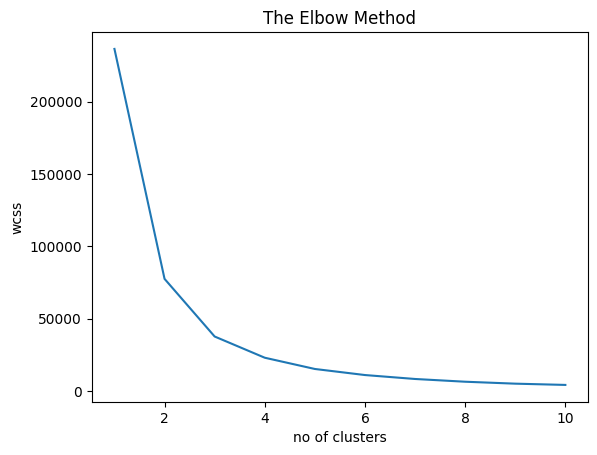

In [78]:
# Hacemos el codo y vemos cuantos clusters necesitamos

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

# entre 2 y 3

In [79]:
# Construimos el modelo

kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

In [80]:
X

,suma_tc,precio_final
0,0.259245,29.674911
1,0.259245,47.978472
2,0.259245,30.860525
3,0.259245,14.185886
4,0.259245,22.429877
...,...,...
2075,0.402461,25.743847
2076,0.402461,30.452646
2077,0.402461,21.185156
2078,0.402461,44.215318


In [81]:
# Convertimos la X en array para que pueda leerlo nuestro codigo
X = X.values

In [82]:
X

array([[ 0.259245  , 29.674911  ],
       [ 0.259245  , 47.97847215],
       [ 0.259245  , 30.8605248 ],
       ...,
       [ 0.402461  , 21.18515612],
       [ 0.402461  , 44.21531808],
       [ 0.402461  , 23.2120512 ]])

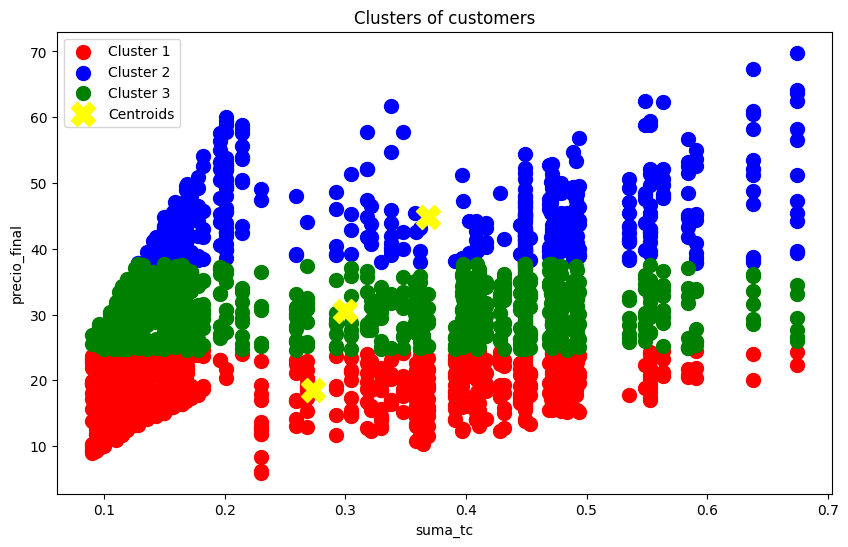

In [83]:

colors = ['red', 'blue', 'green']  # Colores para los clústeres
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']  # Etiquetas para los clústeres

# Graficar los clústeres
plt.figure(figsize=(10, 6))
for i in range(3):  # Cambiado de 4 a 3 para los 3 clústeres
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=100, c=colors[i], label=labels[i])

# Graficar los centroides
centroids = kmeansmodel.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids', marker='X')

# Agregar título y etiquetas
plt.title('Clusters of customers')
plt.xlabel('suma_tc')
plt.ylabel('precio_final')
plt.legend()
plt.show()

### Intento 2

In [84]:
# Calculamos variables adicionales
dt['consumo_total'] = dt[['consumo_valle', 'consumo_llano', 'consumo_punta', 'consumo_8h', 'consumo_16h']].sum(axis=1)
dt['gasto_total'] = dt[['consumo_euros_valle', 'consumo_euros_llano', 'consumo_euros_punta', 'consumo_euros_8h', 'consumo_euros_16h']].sum(axis=1)
dt['tarifa_media'] = dt[['tc_valle_euros/kwh/hora', 'tc_llano_euros/kwh/hora', 'tc_punta_euros/kwh/hora', 'tc_8h_euros/kwh/hora', 'tc_16h_euros/kwh/hora']].mean(axis=1)


In [85]:
# Selecciona variables para el clustering
X = dt[['suma_tc', 'precio_final', 'consumo_total', 'gasto_total', 'tarifa_media']]

In [86]:
# Normaliza las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

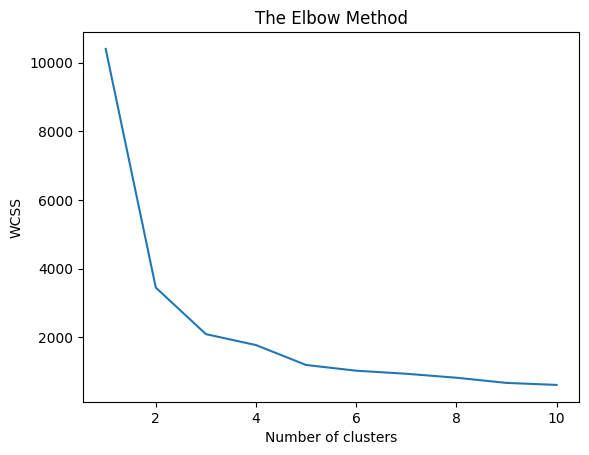

In [87]:
# Realizamos el método del codo para determinar el número óptimo de clústeres
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [88]:
# Aplicar KMeans con el número óptimo de clústeres
kmeansmodel = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(X_scaled)

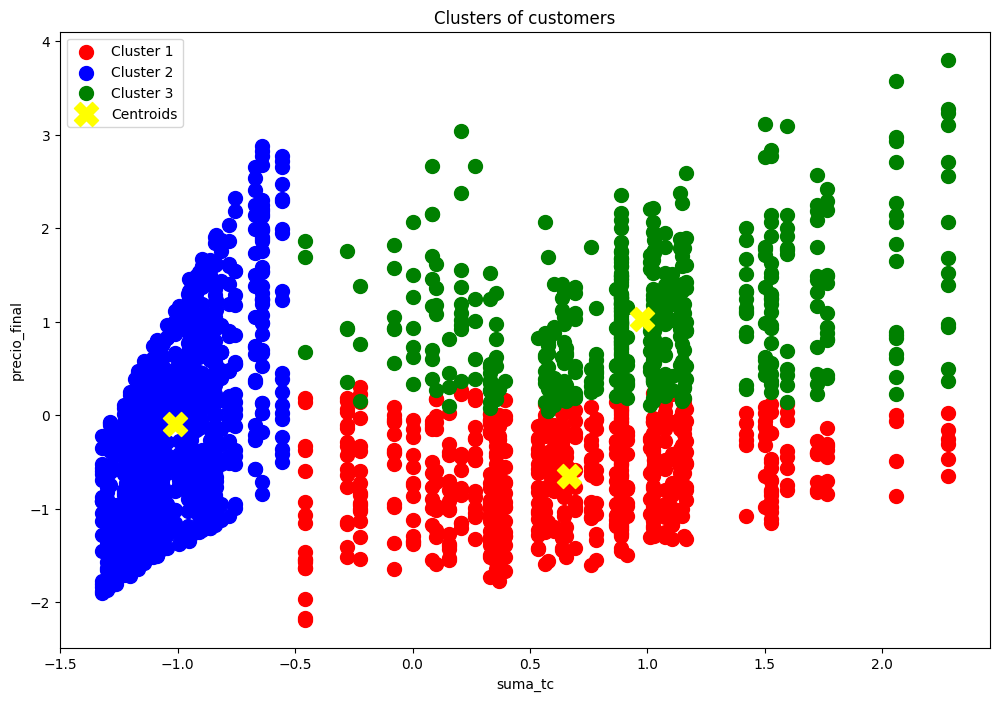

In [89]:
# Creamos el gráfico con los clusters
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green']  # Colores para los clústeres
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']  # Etiquetas para los clústeres
for i in range(3):
    plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], s=100, c=colors[i], label=labels[i])

centroids = kmeansmodel.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids', marker='X')

plt.title('Clusters of customers')
plt.xlabel('suma_tc')
plt.ylabel('precio_final')
plt.legend()
plt.show()